In [48]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [49]:
FORESIGHT_DIRECTORY = os.path.dirname(os.getcwd())
DATA_INTERIM_DIRECTORY = "/data/interim/"
DATA = "players_1.csv"

In [50]:
FILE_DIRECTORY = FORESIGHT_DIRECTORY + DATA_INTERIM_DIRECTORY + DATA

In [51]:
df= pd.read_csv(FILE_DIRECTORY)

In [52]:
df.head()

,pc1_class,pc1_level,pc1_hp_max,pc1_ac,pc1_STR,pc1_DEX,pc1_CON,pc1_INT,pc1_WIS,pc1_CHA,...,monster7_STR,monster7_DEX,monster7_CON,monster7_INT,monster7_WIS,monster7_CHA,winner,not_conscious_players_ratio,party_hp_ratio,difficulty
0,Bard,1,12,11,-1,0,4,0,0,4,...,0,0,0,0,0,0,monsters,1.0,0.0,9
1,Bard,1,10,13,-1,2,2,2,1,3,...,0,0,0,0,0,0,monsters,1.0,0.0,9
2,Bard,1,7,11,2,0,-1,0,2,4,...,0,0,0,0,0,0,monsters,1.0,0.0,9
3,Bard,1,8,10,-1,-1,0,2,1,3,...,0,0,0,0,0,0,monsters,1.0,0.0,9
4,Bard,1,11,12,4,1,3,0,2,4,...,0,0,0,0,0,0,monsters,1.0,0.0,9


In [53]:
df[df.pc1_class == 'Bard'].shape

(95284, 84)

In [54]:
hero_class = list(df.pc1_class.unique())

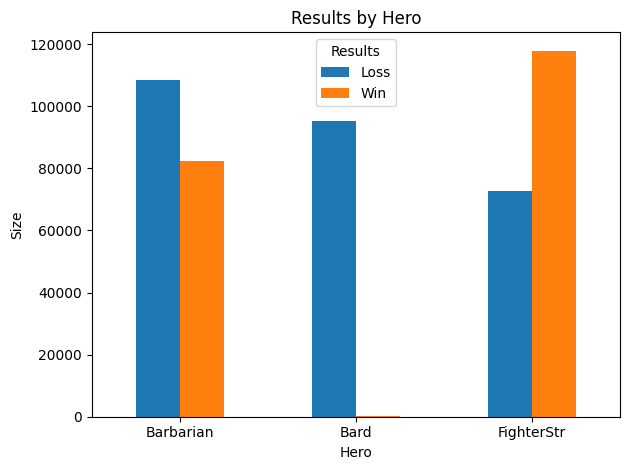

In [55]:
conteo = df.groupby(['pc1_class', 'winner']).size().unstack(fill_value=0)


conteo = conteo.rename(columns={'party': 'Win', 'monsters': 'Loss'})

# Graph
conteo.plot(kind='bar', stacked=False)
plt.title('Results by Hero')
plt.xlabel('Hero')
plt.ylabel('Size')
plt.xticks(rotation=0)
plt.legend(title='Results')
plt.tight_layout()
plt.show()

In [56]:
df.head().iloc[:,11:]

,monster1_cr,monster1_hp_max,monster1_ac,monster1_STR,monster1_DEX,monster1_CON,monster1_INT,monster1_WIS,monster1_CHA,monster2_name,...,monster7_STR,monster7_DEX,monster7_CON,monster7_INT,monster7_WIS,monster7_CHA,winner,not_conscious_players_ratio,party_hp_ratio,difficulty
0,0.125,11,12,0,1,1,0,0,0,Blood Hawk,...,0,0,0,0,0,0,monsters,1.0,0.0,9
1,0.125,11,12,0,1,1,0,0,0,Blood Hawk,...,0,0,0,0,0,0,monsters,1.0,0.0,9
2,0.125,11,12,0,1,1,0,0,0,Blood Hawk,...,0,0,0,0,0,0,monsters,1.0,0.0,9
3,0.125,11,12,0,1,1,0,0,0,Blood Hawk,...,0,0,0,0,0,0,monsters,1.0,0.0,9
4,0.125,11,12,0,1,1,0,0,0,Blood Hawk,...,0,0,0,0,0,0,monsters,1.0,0.0,9


In [57]:
df.columns

Index(['pc1_class', 'pc1_level', 'pc1_hp_max', 'pc1_ac', 'pc1_STR', 'pc1_DEX',
       'pc1_CON', 'pc1_INT', 'pc1_WIS', 'pc1_CHA', 'monster1_name',
       'monster1_cr', 'monster1_hp_max', 'monster1_ac', 'monster1_STR',
       'monster1_DEX', 'monster1_CON', 'monster1_INT', 'monster1_WIS',
       'monster1_CHA', 'monster2_name', 'monster2_cr', 'monster2_hp_max',
       'monster2_ac', 'monster2_STR', 'monster2_DEX', 'monster2_CON',
       'monster2_INT', 'monster2_WIS', 'monster2_CHA', 'monster3_name',
       'monster3_cr', 'monster3_hp_max', 'monster3_ac', 'monster3_STR',
       'monster3_DEX', 'monster3_CON', 'monster3_INT', 'monster3_WIS',
       'monster3_CHA', 'monster4_name', 'monster4_cr', 'monster4_hp_max',
       'monster4_ac', 'monster4_STR', 'monster4_DEX', 'monster4_CON',
       'monster4_INT', 'monster4_WIS', 'monster4_CHA', 'monster5_name',
       'monster5_cr', 'monster5_hp_max', 'monster5_ac', 'monster5_STR',
       'monster5_DEX', 'monster5_CON', 'monster5_INT', 'monster

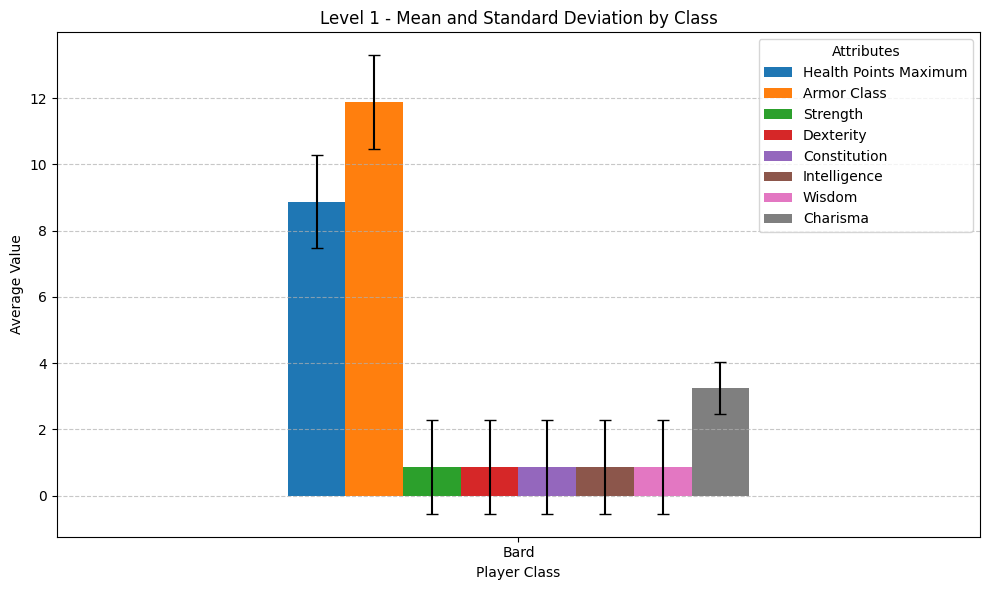

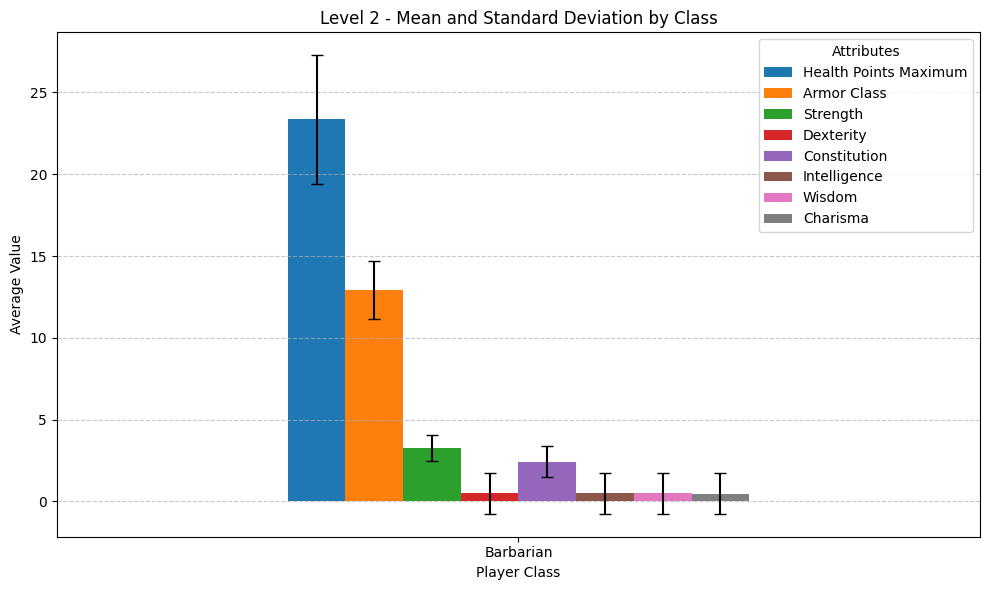

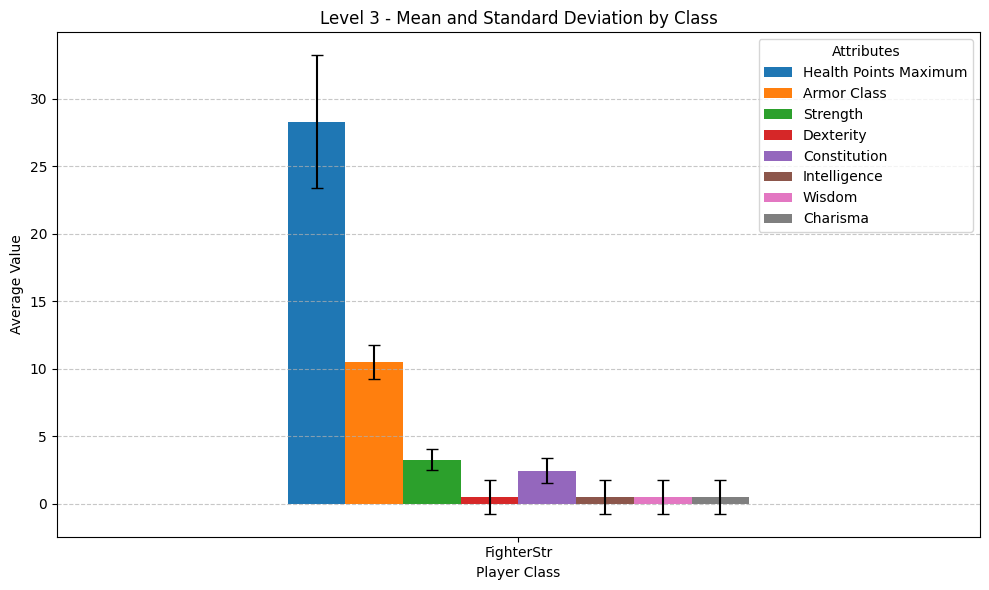

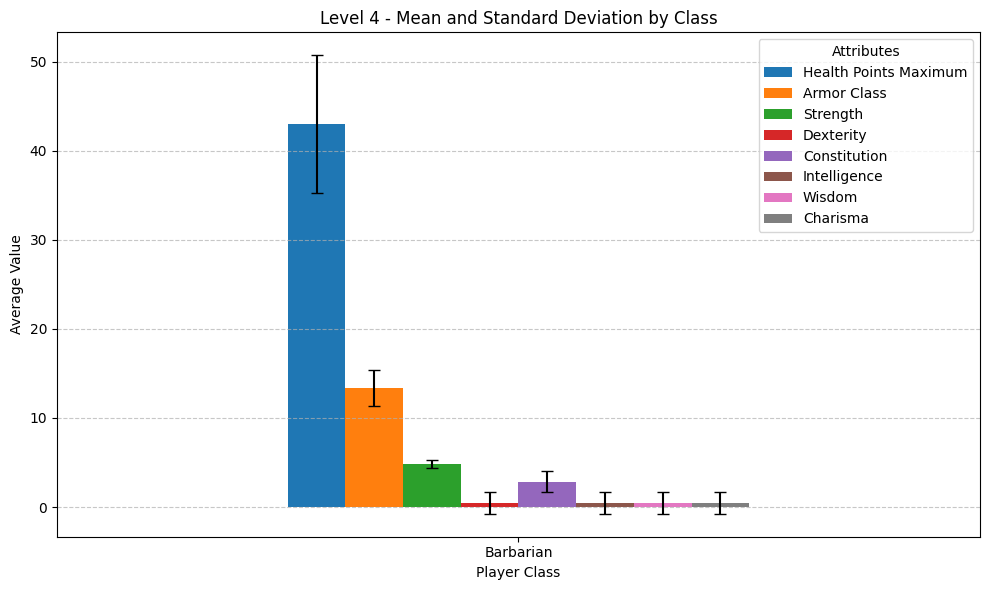

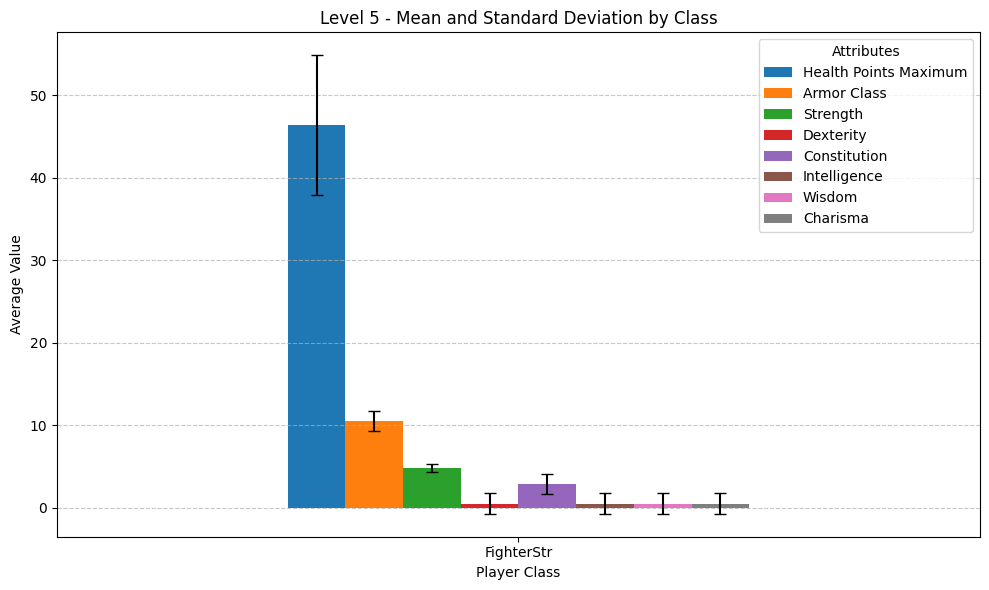

In [58]:
# Dictionary with readable D&D attribute names
attribute_names = {
    'pc1_hp_max': 'Health Points Maximum',
    'pc1_ac': 'Armor Class',
    'pc1_STR': 'Strength',
    'pc1_DEX': 'Dexterity',
    'pc1_CON': 'Constitution',
    'pc1_INT': 'Intelligence',
    'pc1_WIS': 'Wisdom',
    'pc1_CHA': 'Charisma'
}

# Attributes to plot
attributes = list(attribute_names.keys())

# Unique levels
levels = sorted(df['pc1_level'].unique())

for level in levels:
    df_level = df[df['pc1_level'] == level]

    # Group by class and calculate mean and standard deviation
    mean_values = df_level.groupby('pc1_class')[attributes].mean()
    std_values = df_level.groupby('pc1_class')[attributes].std()

    # Rename columns using readable names
    mean_values.rename(columns=attribute_names, inplace=True)
    std_values.rename(columns=attribute_names, inplace=True)

    # Plotting
    ax = mean_values.plot(kind='bar', yerr=std_values, capsize=4, figsize=(10, 6))

    plt.title(f'Level {level} - Mean and Standard Deviation by Class')
    plt.ylabel('Average Value')
    plt.xlabel('Player Class')
    plt.xticks(rotation=0)
    plt.legend(title='Attributes')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

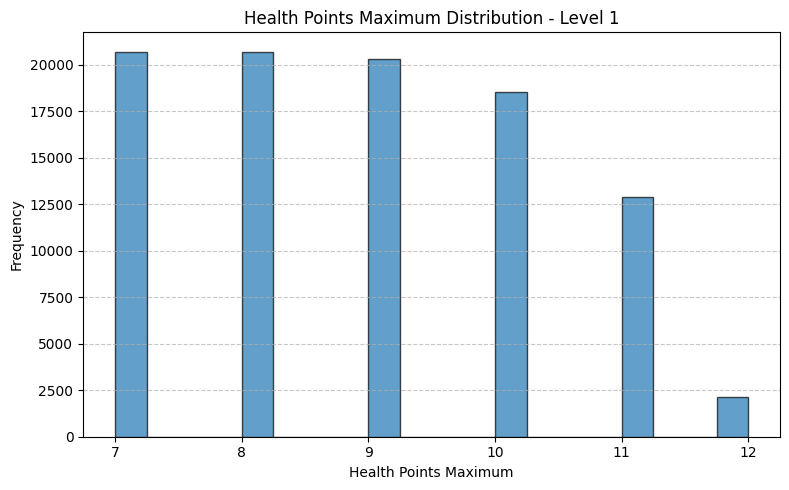

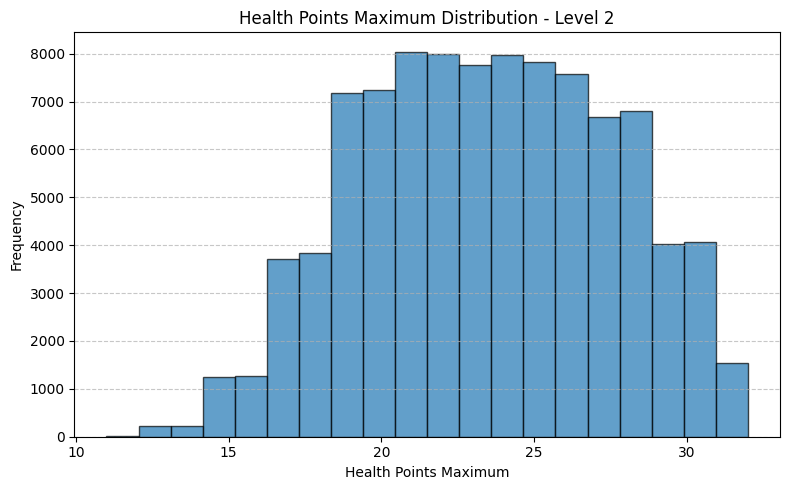

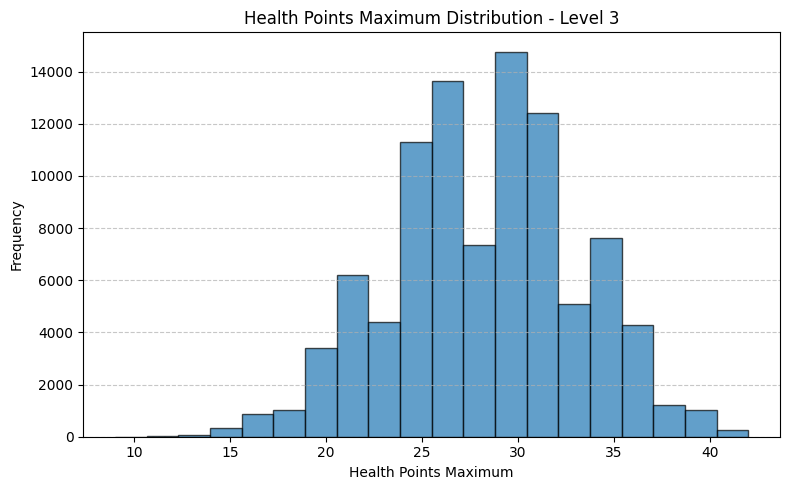

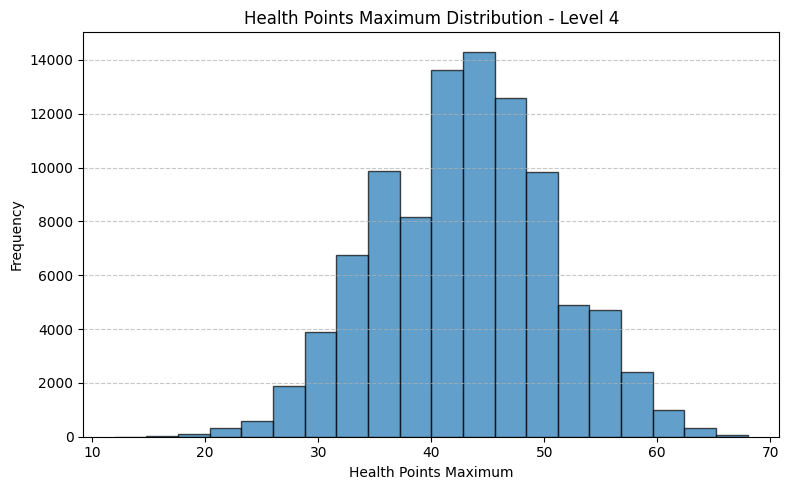

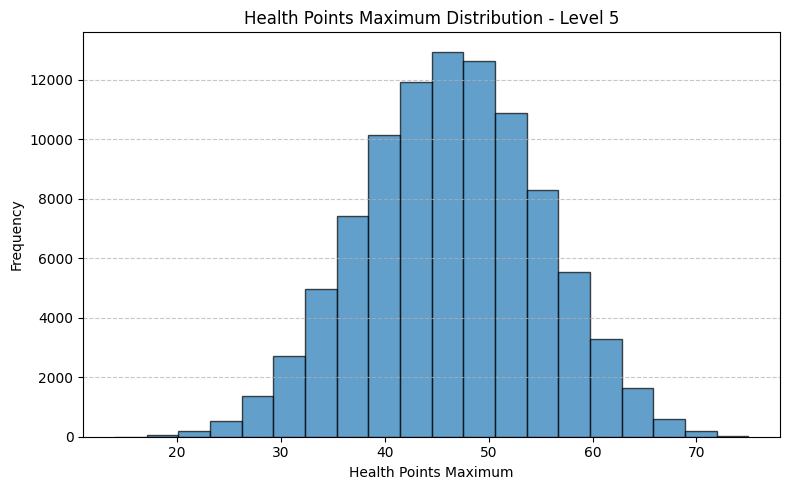

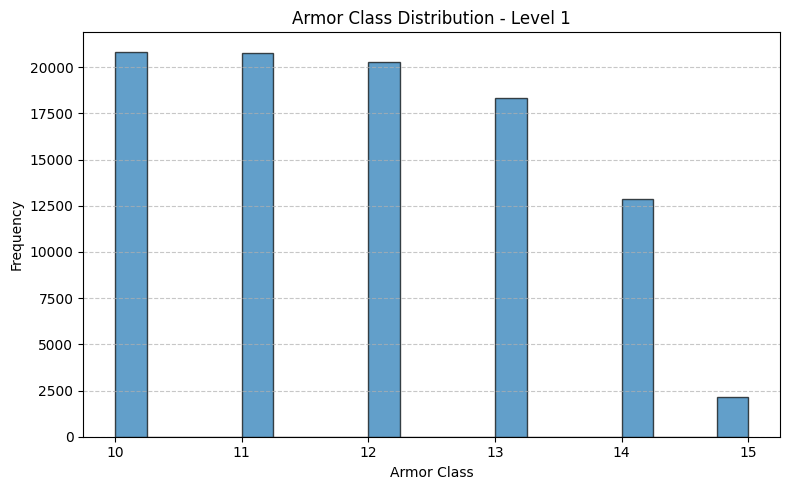

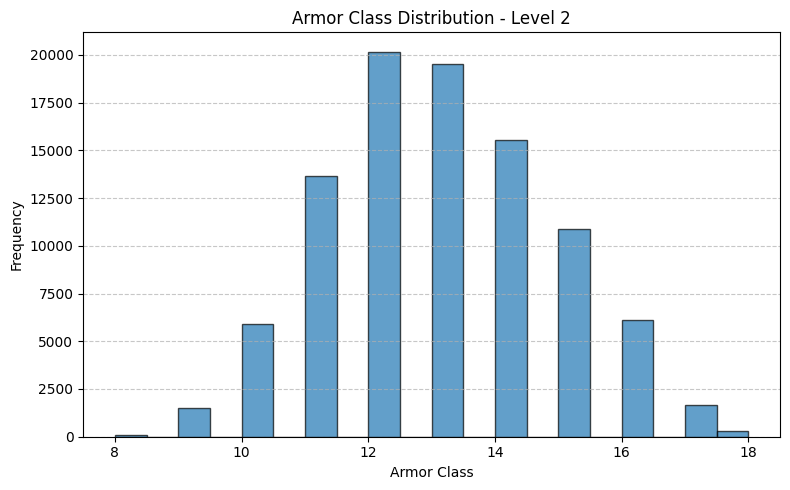

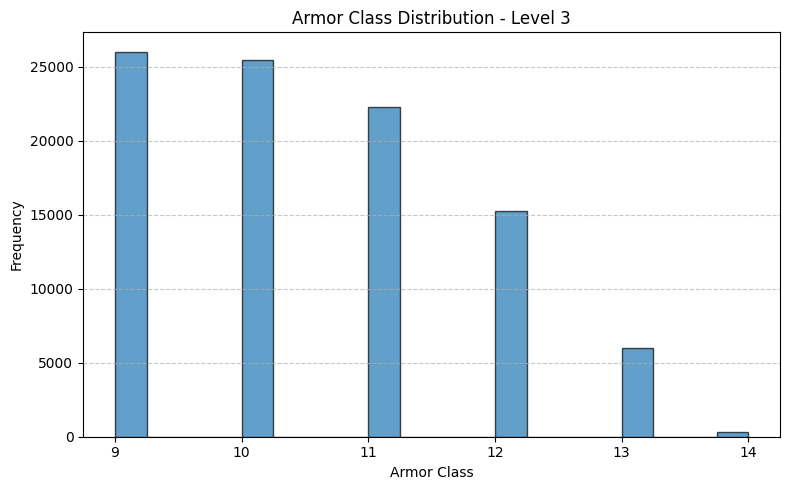

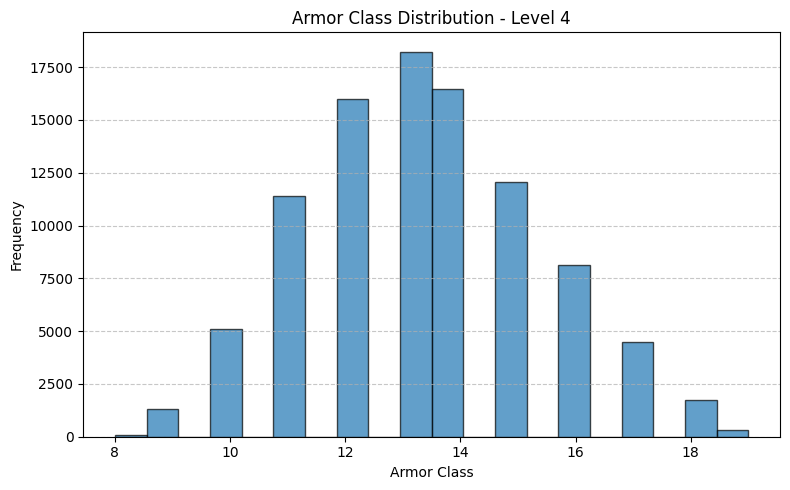

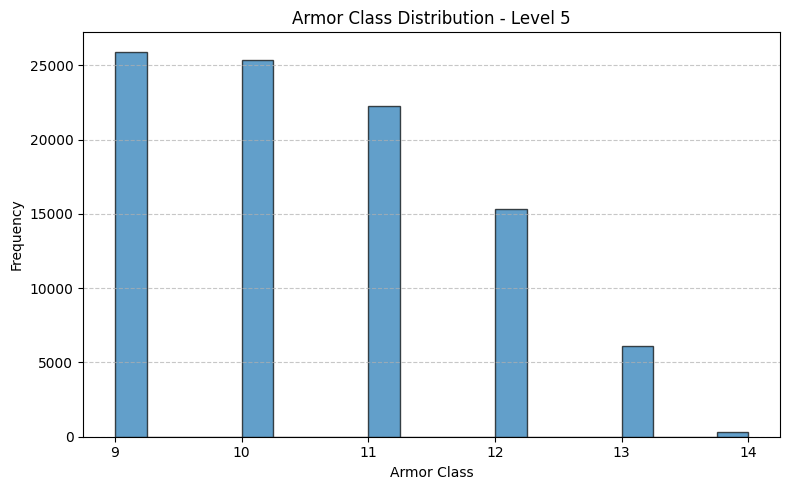

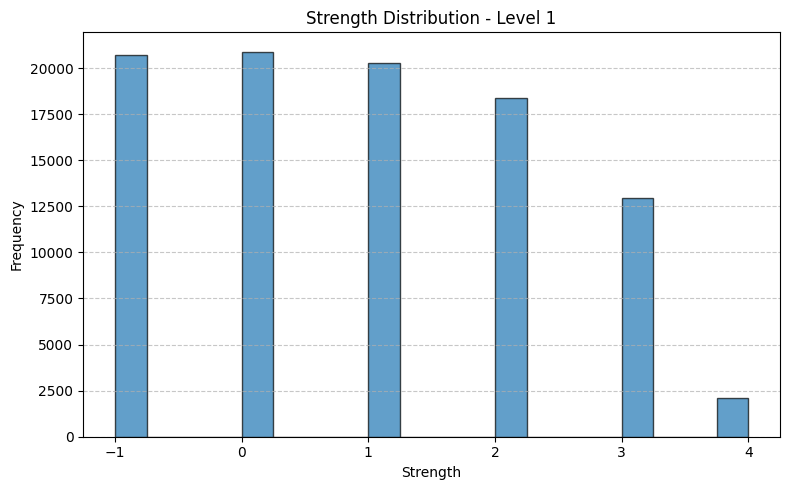

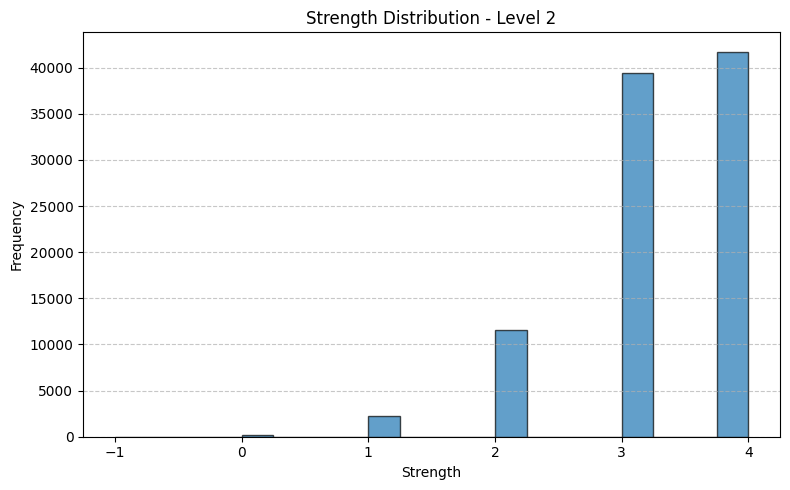

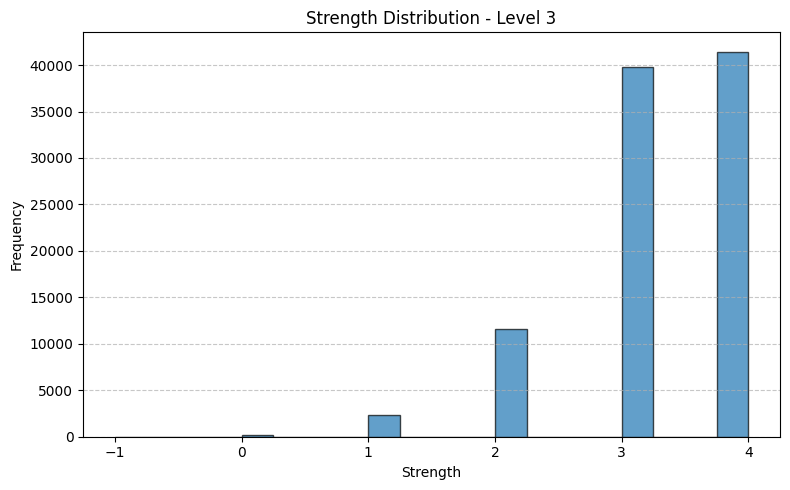

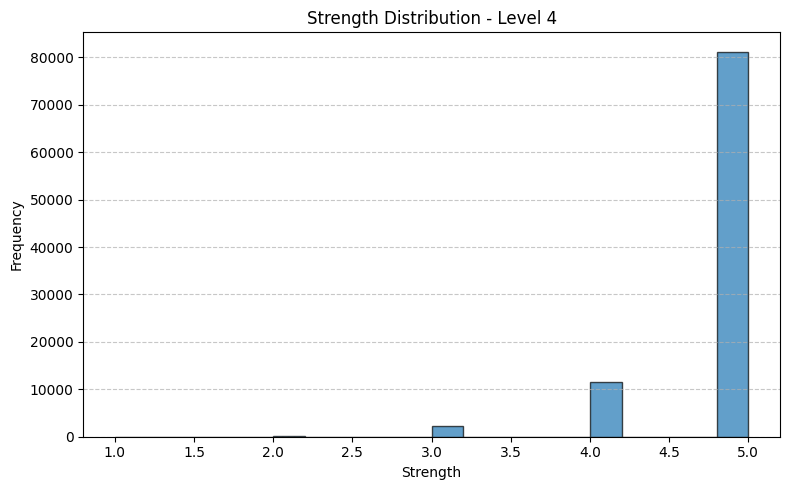

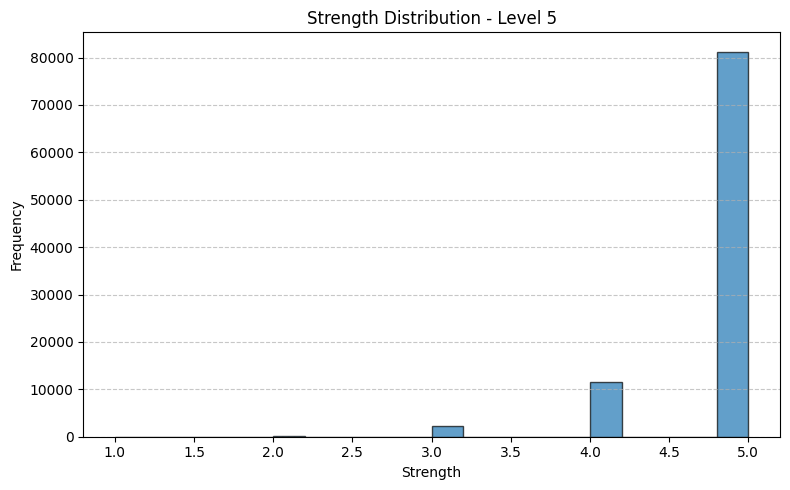

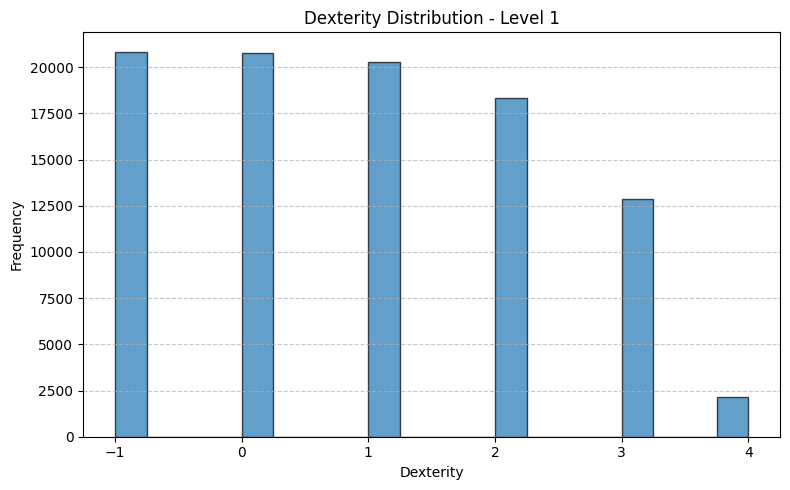

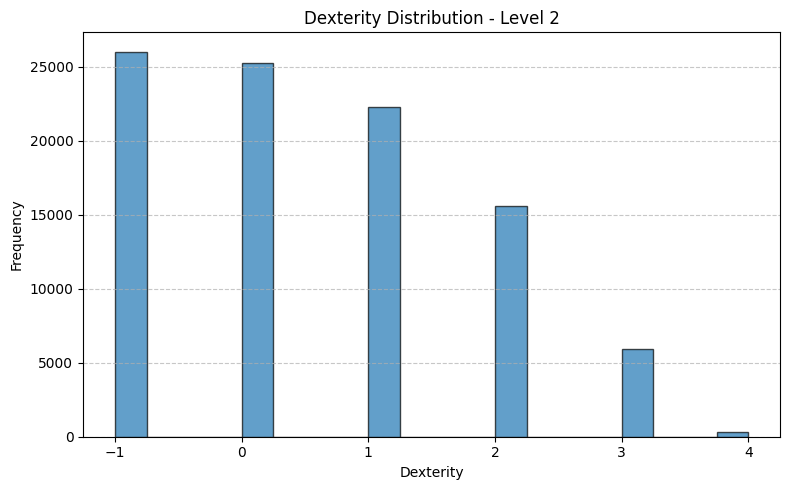

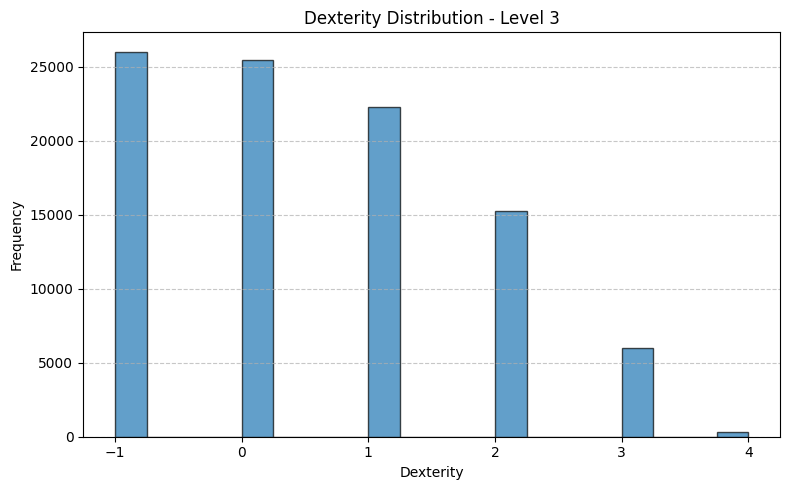

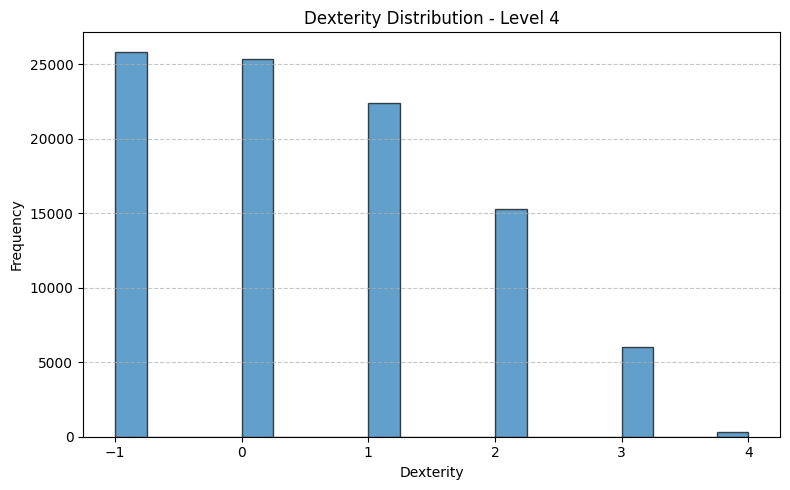

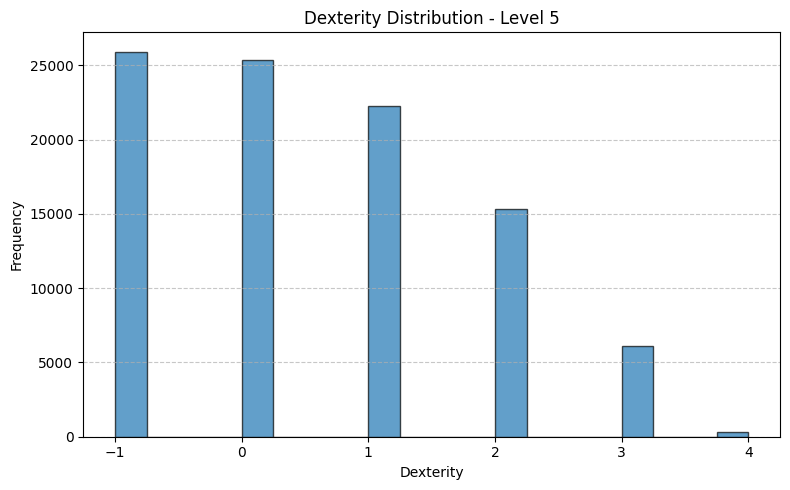

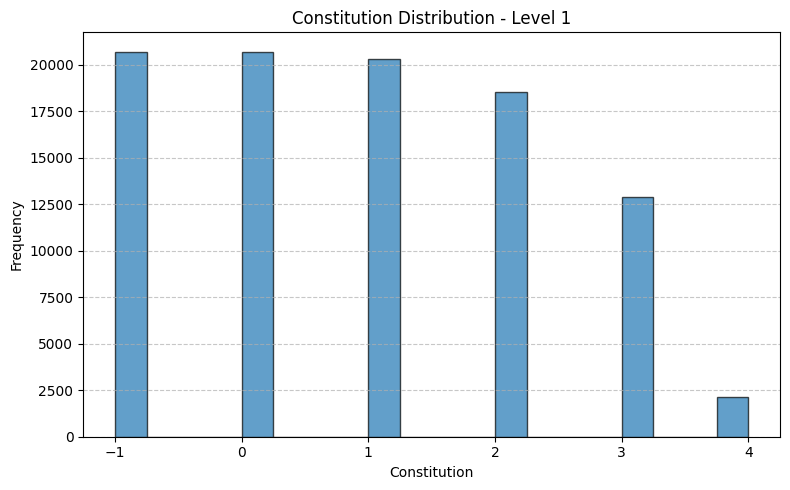

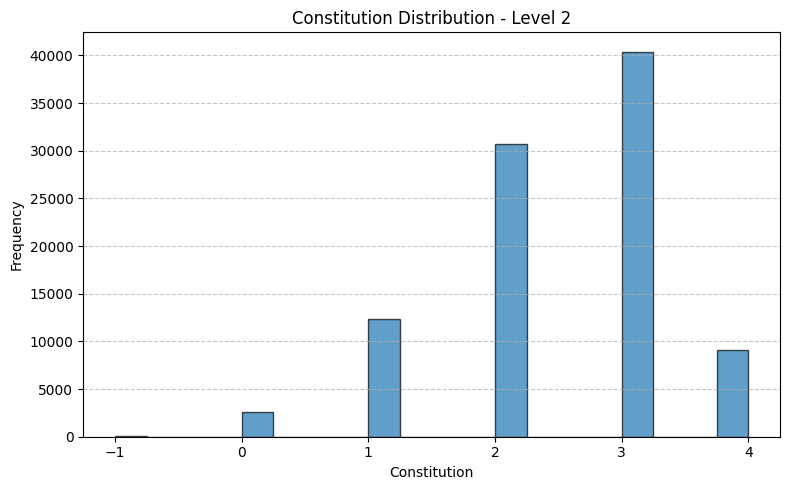

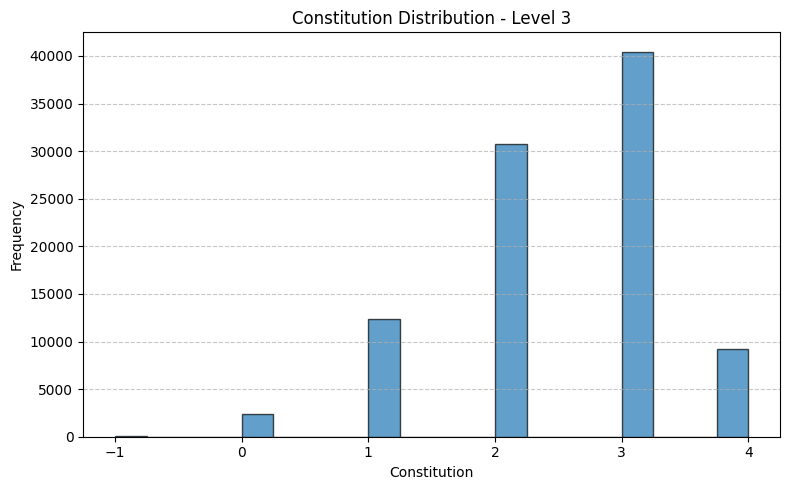

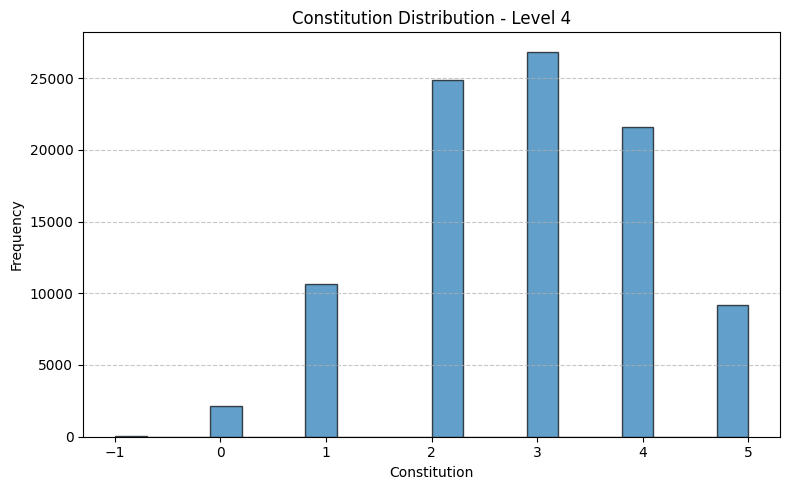

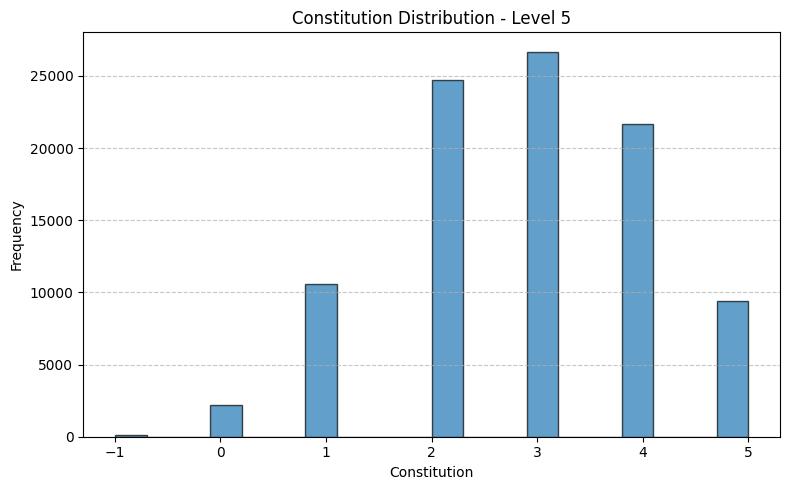

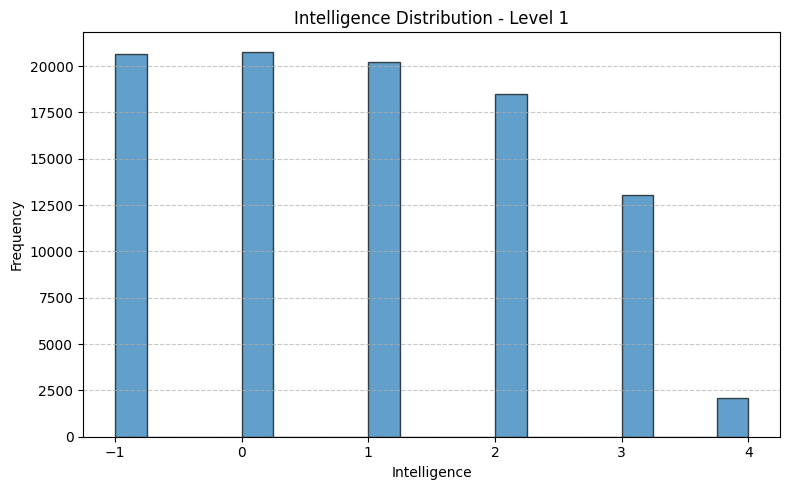

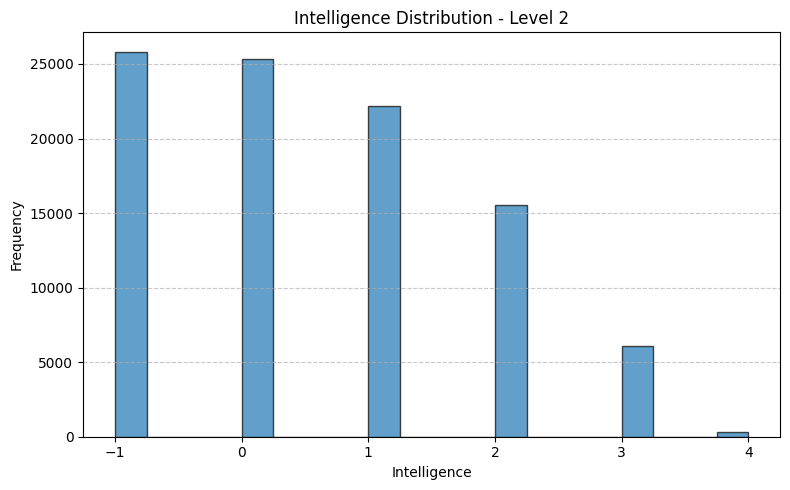

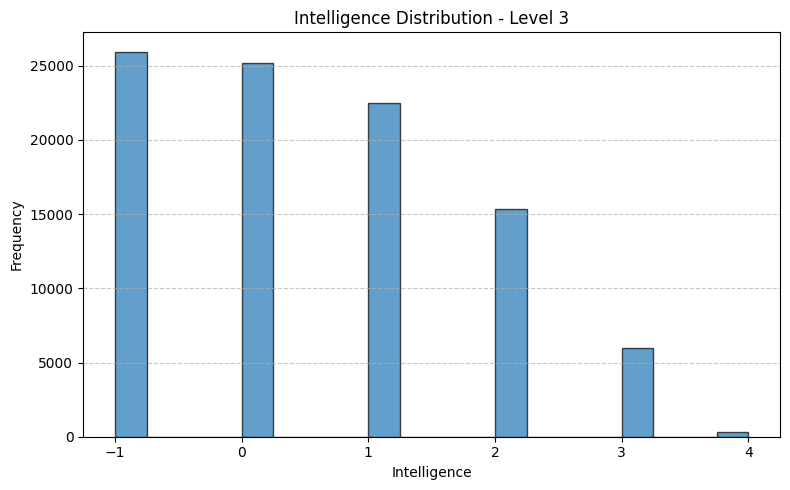

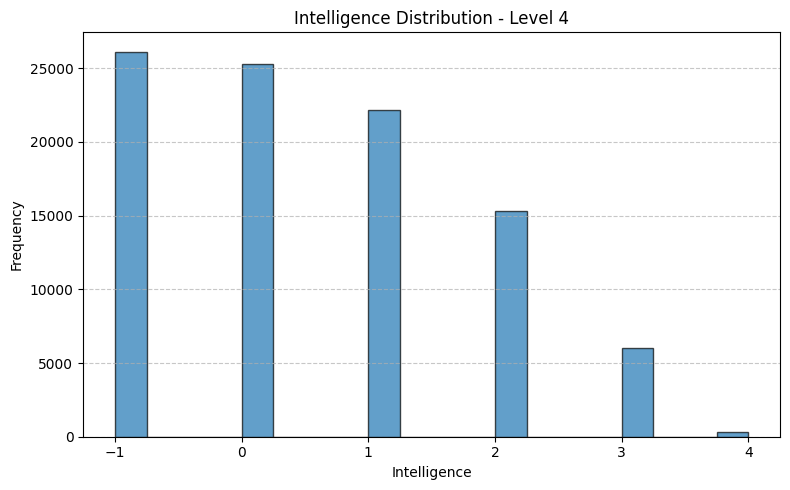

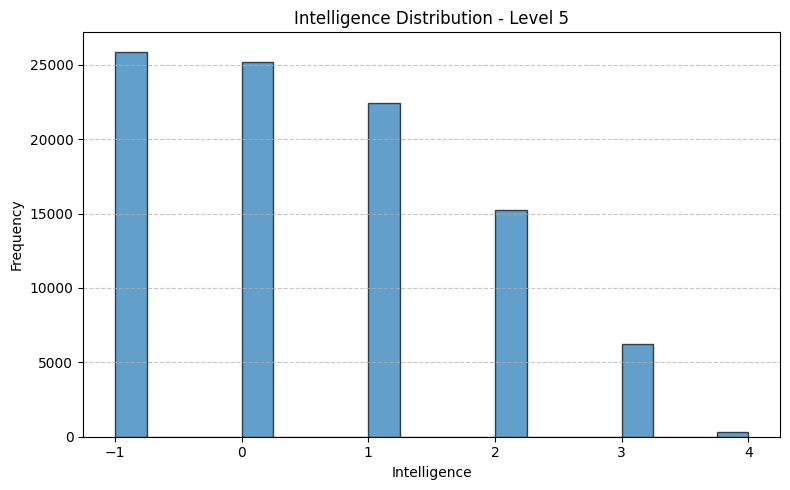

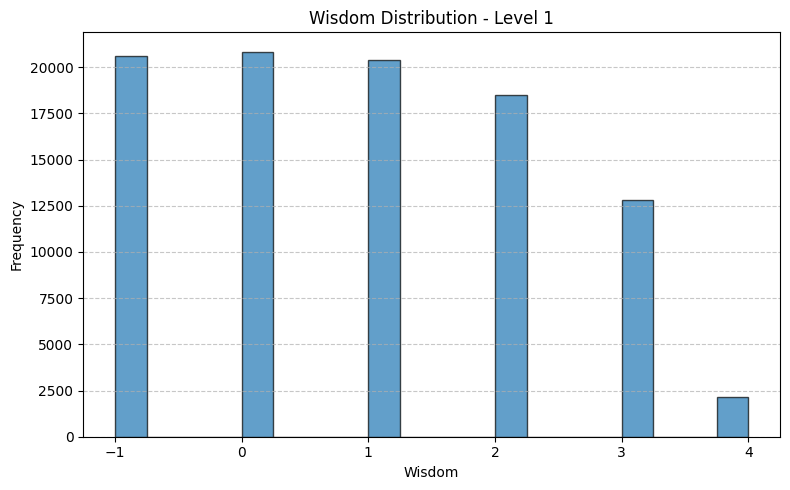

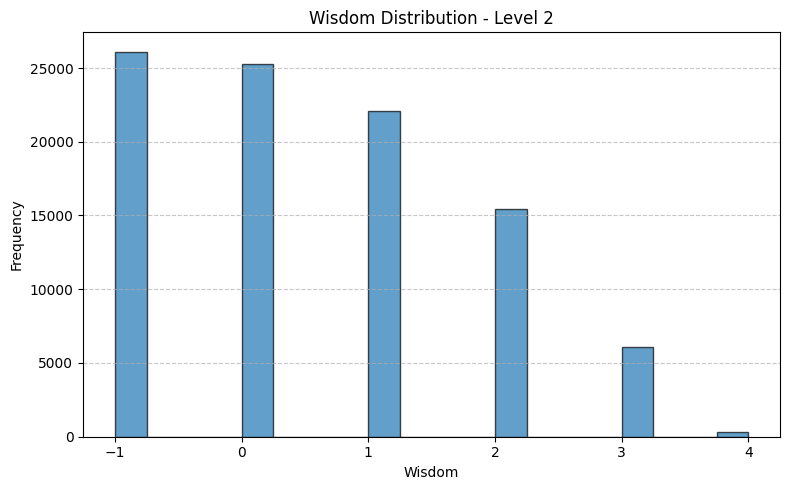

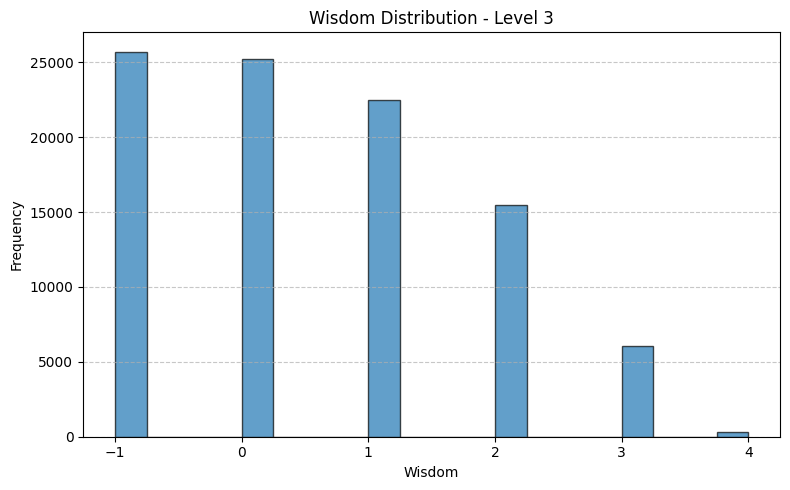

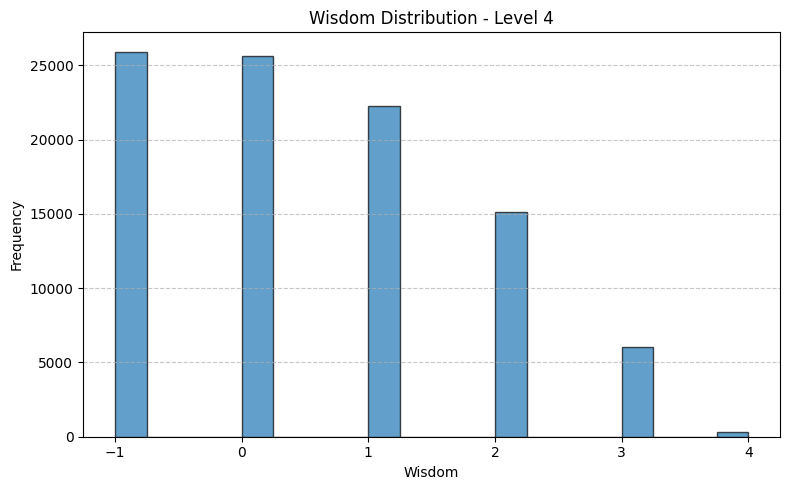

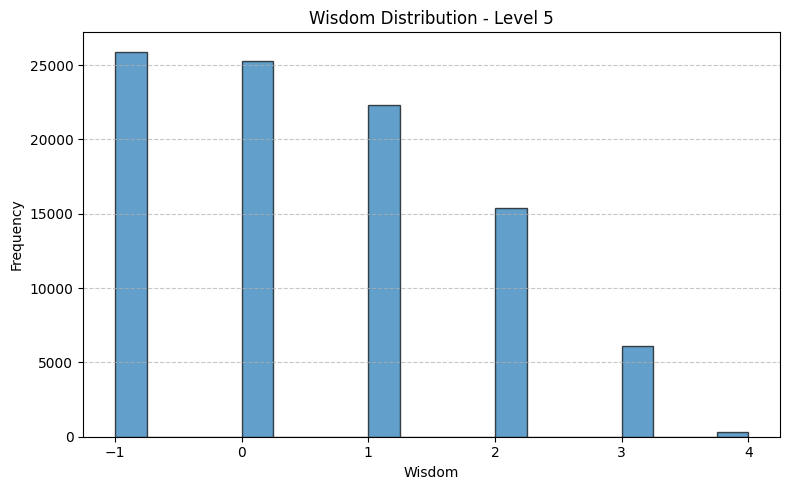

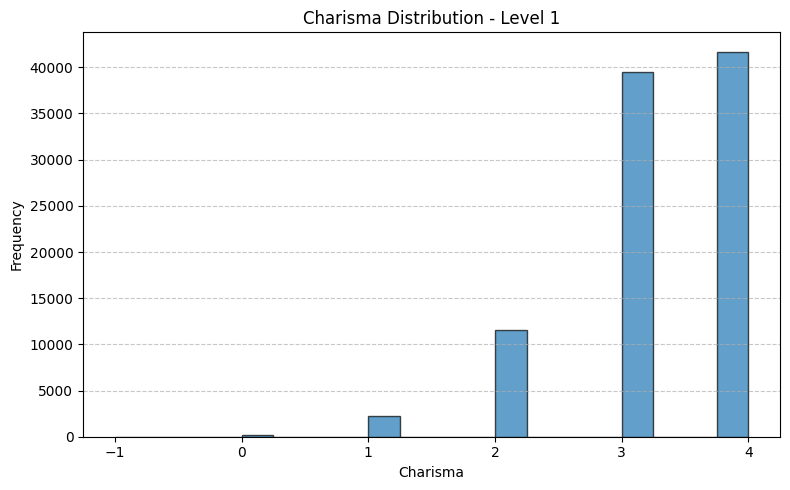

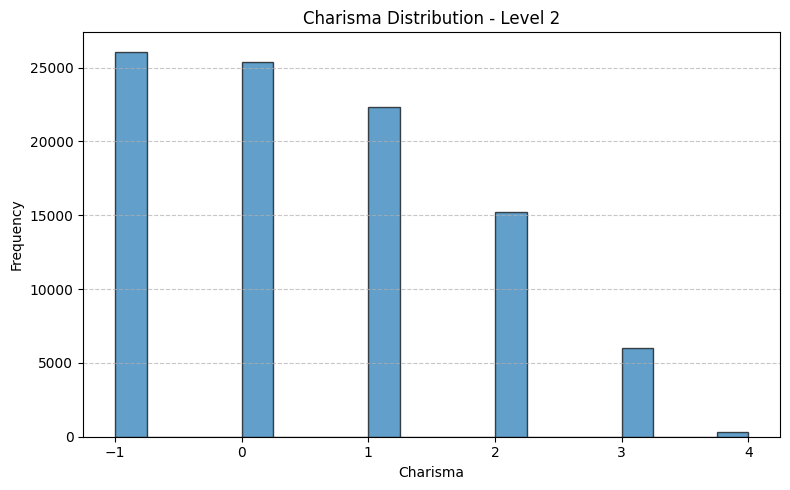

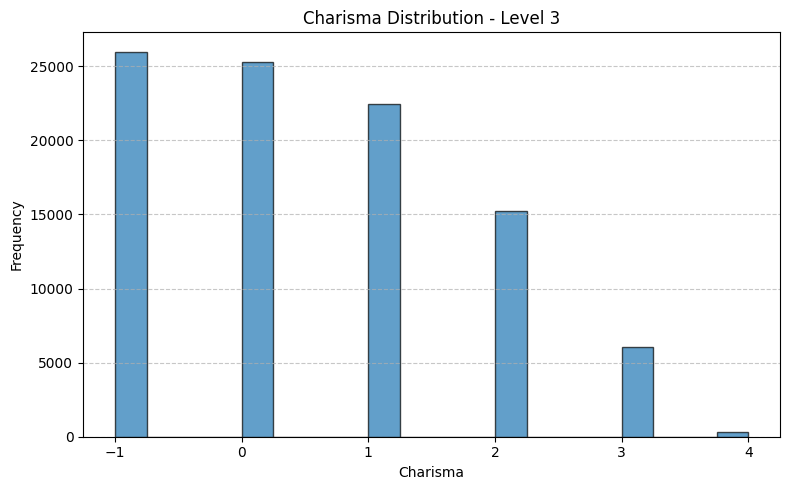

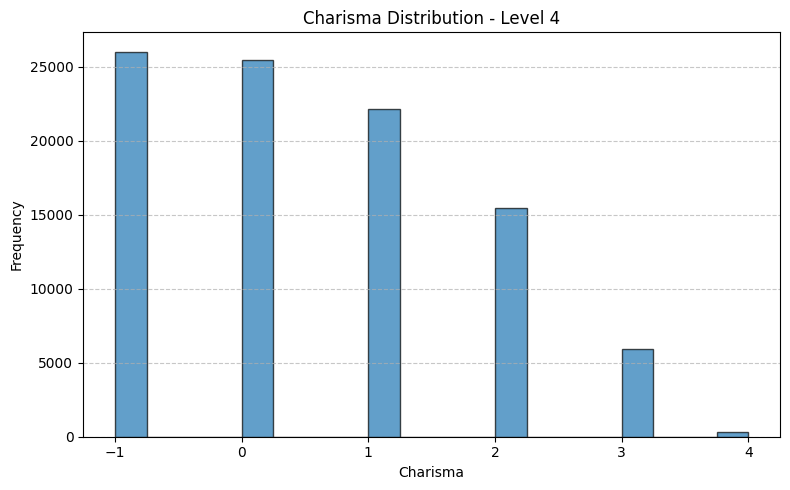

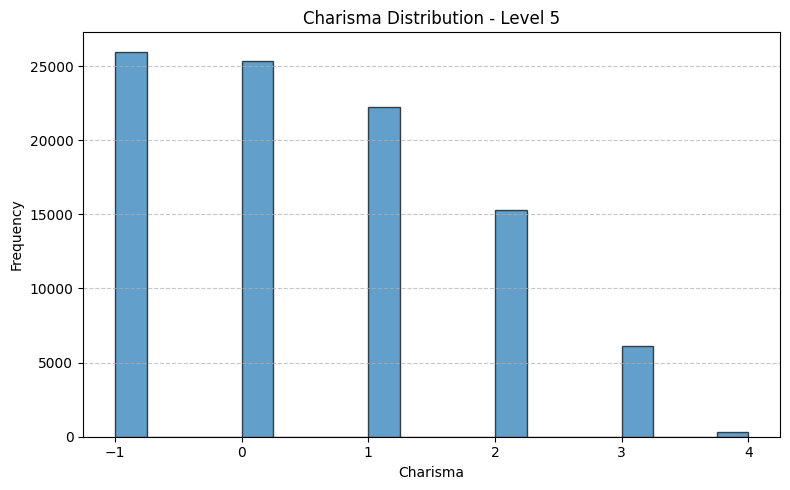

In [59]:
# Histograms per attribute, one plot per level
levels = sorted(df['pc1_level'].dropna().unique())

for attr_code, attr_name in attribute_names.items():
    for level in levels:
        # Filtrar los datos del nivel actual
        values = df[df['pc1_level'] == level][attr_code].dropna()
        
        # Evitar graficar si no hay datos
        if values.empty:
            continue

        plt.figure(figsize=(8, 5))
        plt.hist(values, bins=20, edgecolor='black', alpha=0.7)
        plt.title(f'{attr_name} Distribution - Level {level}')
        plt.xlabel(attr_name)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


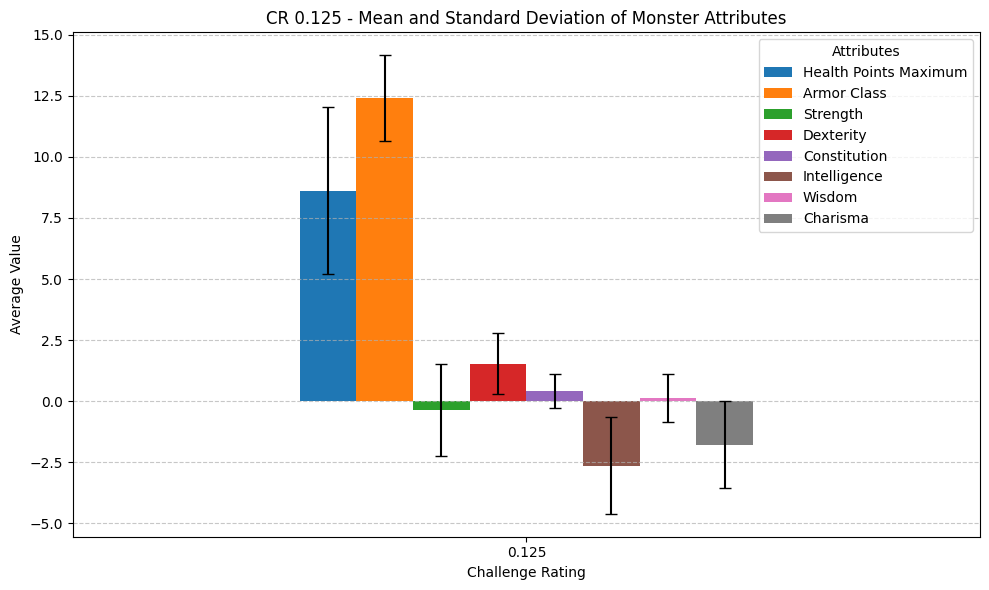

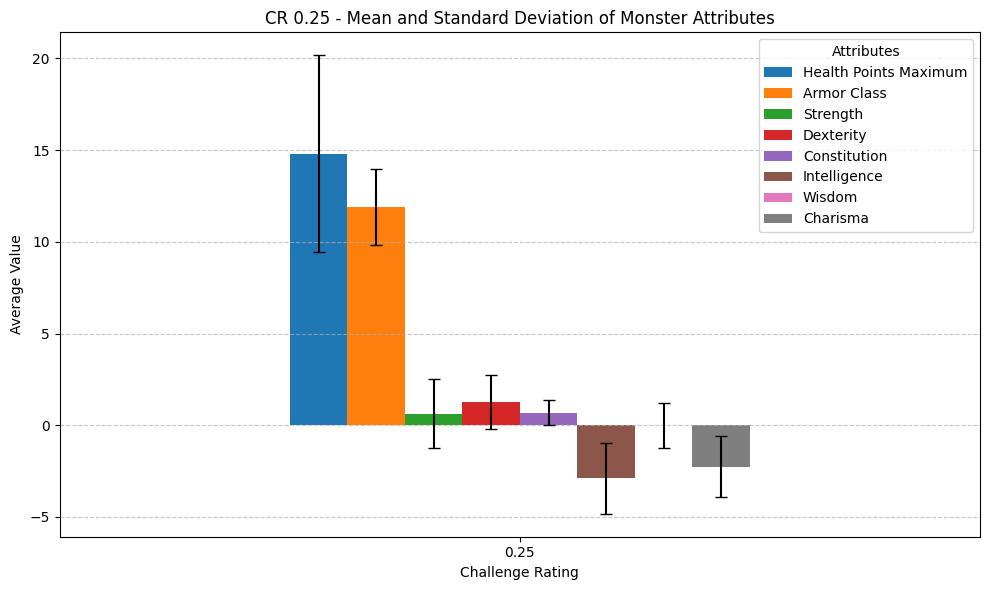

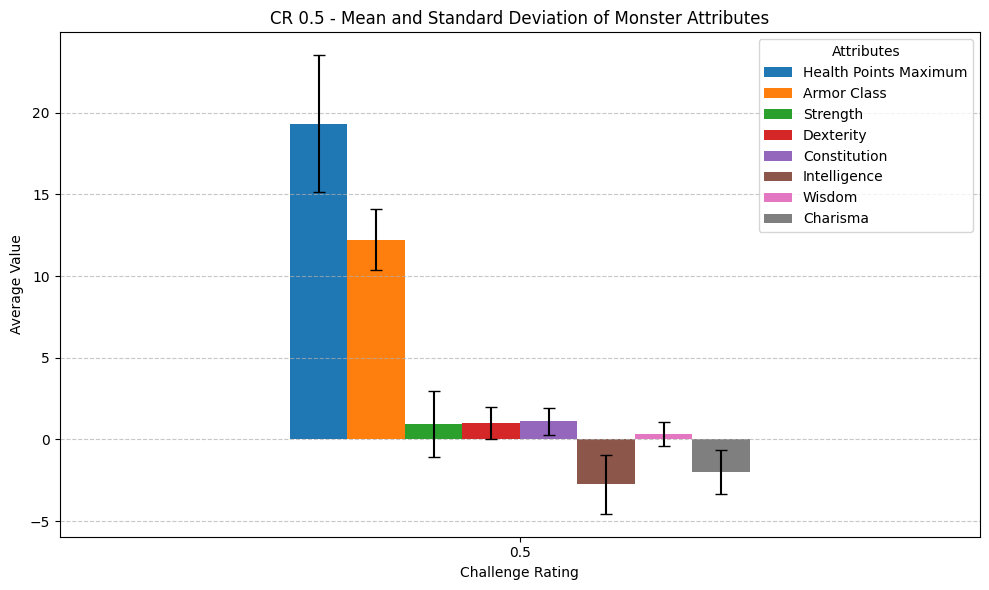

In [60]:
# Dictionary with readable D&D attribute names for monsters
monster_attributes_names = {
    'monster1_hp_max': 'Health Points Maximum',
    'monster1_ac': 'Armor Class',
    'monster1_STR': 'Strength',
    'monster1_DEX': 'Dexterity',
    'monster1_CON': 'Constitution',
    'monster1_INT': 'Intelligence',
    'monster1_WIS': 'Wisdom',
    'monster1_CHA': 'Charisma'
}

# Attributes to plot
monster_attributes = list(monster_attributes_names.keys())

# Unique challenge ratings
challenge_ratings = sorted(df['monster1_cr'].dropna().unique())

for cr in challenge_ratings:
    df_cr = df[df['monster1_cr'] == cr]

    # Group by CR and calculate mean and std
    mean_values = df_cr.groupby('monster1_cr')[monster_attributes].mean()
    std_values = df_cr.groupby('monster1_cr')[monster_attributes].std()

    # Rename columns to readable names
    mean_values.rename(columns=monster_attributes_names, inplace=True)
    std_values.rename(columns=monster_attributes_names, inplace=True)

    # Plotting
    ax = mean_values.plot(kind='bar', yerr=std_values, capsize=4, figsize=(10, 6))

    plt.title(f'CR {cr} - Mean and Standard Deviation of Monster Attributes')
    plt.ylabel('Average Value')
    plt.xlabel('Challenge Rating')
    plt.xticks(rotation=0)
    plt.legend(title='Attributes')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

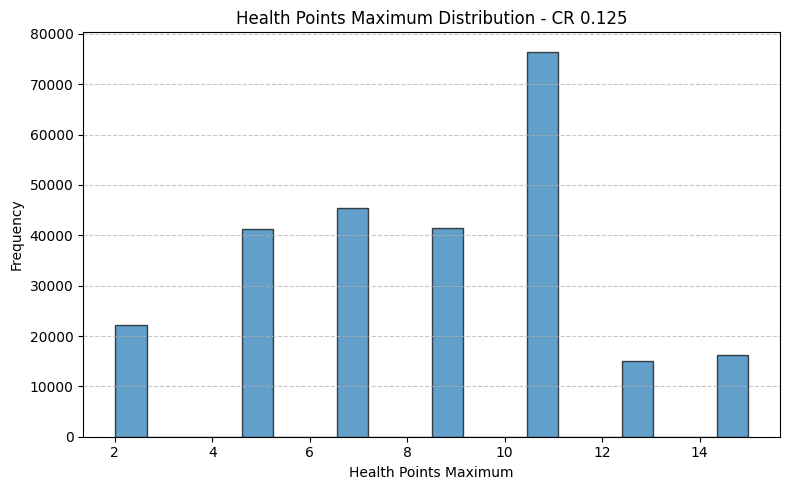

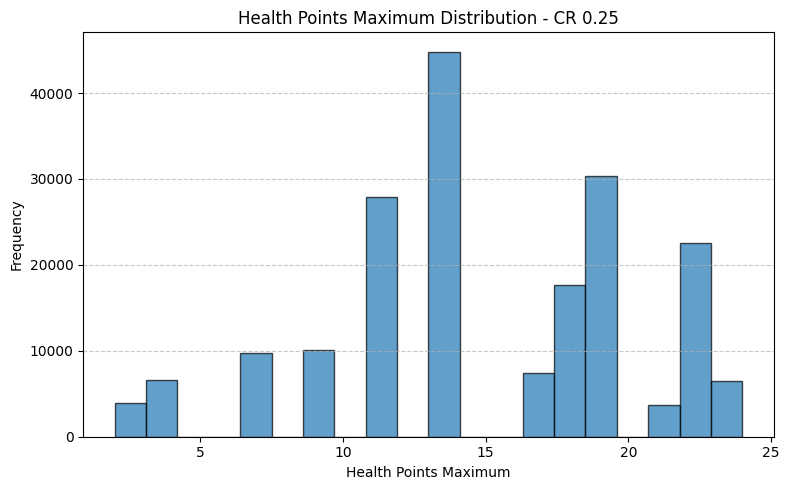

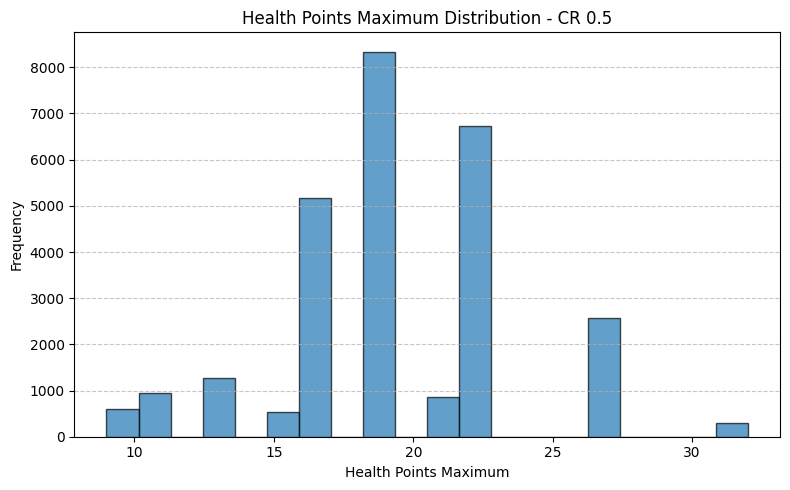

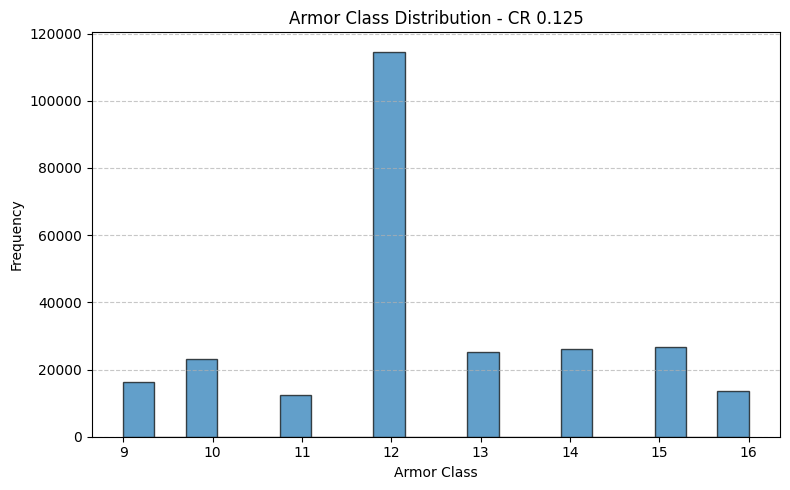

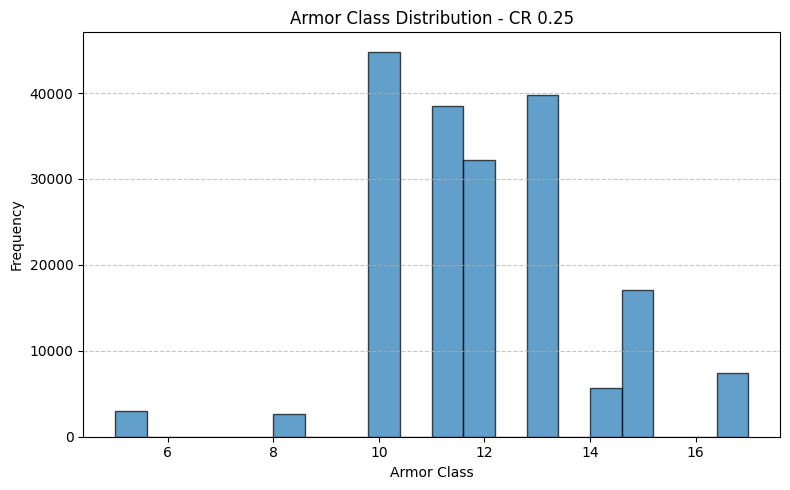

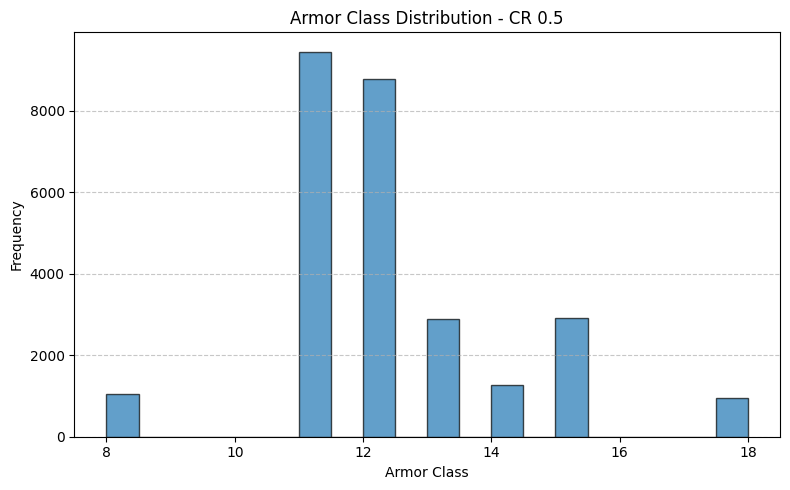

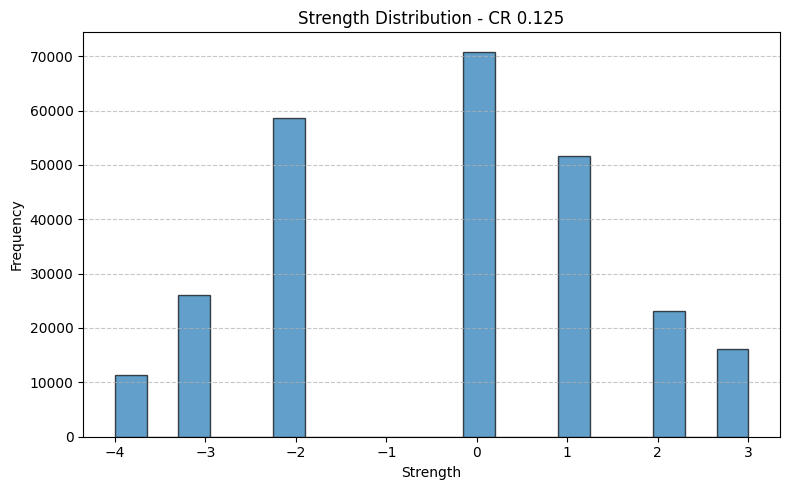

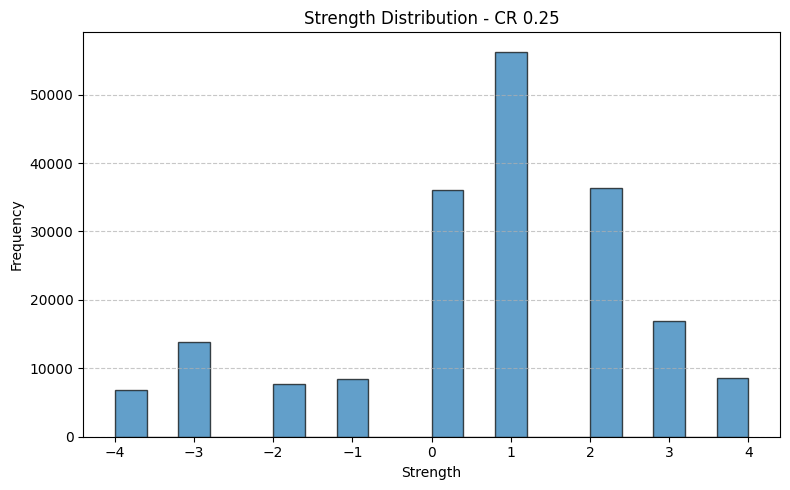

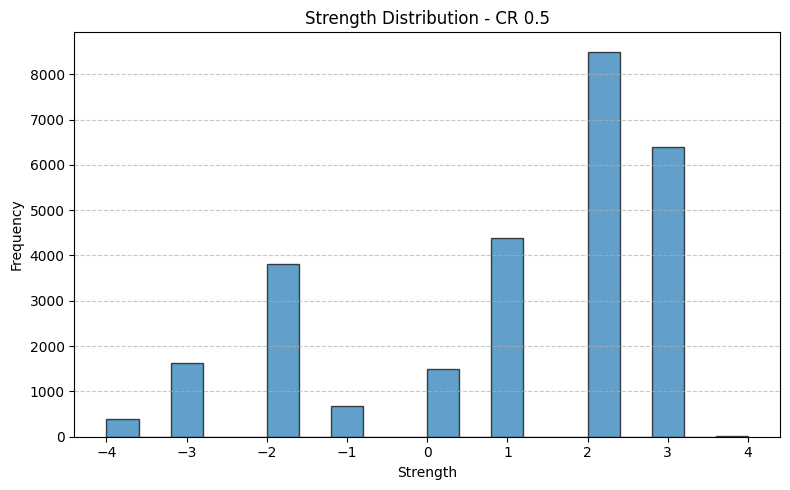

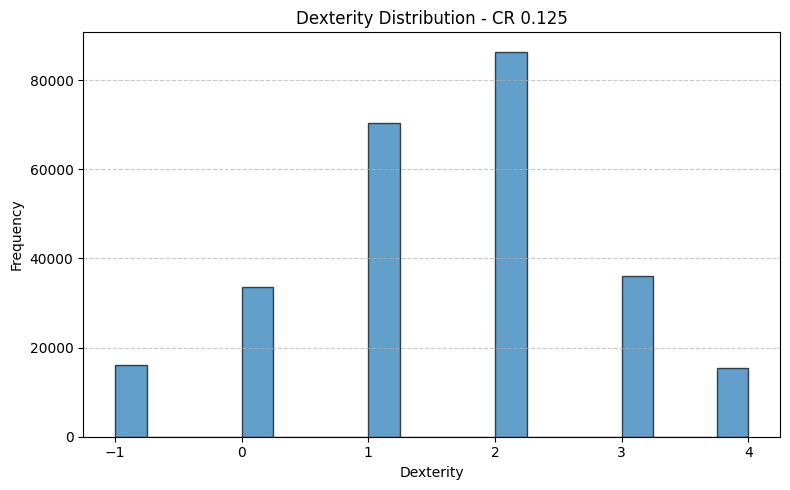

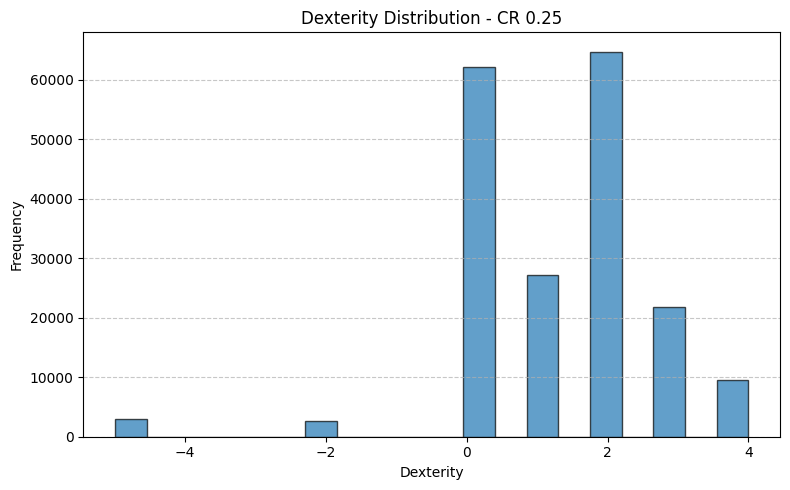

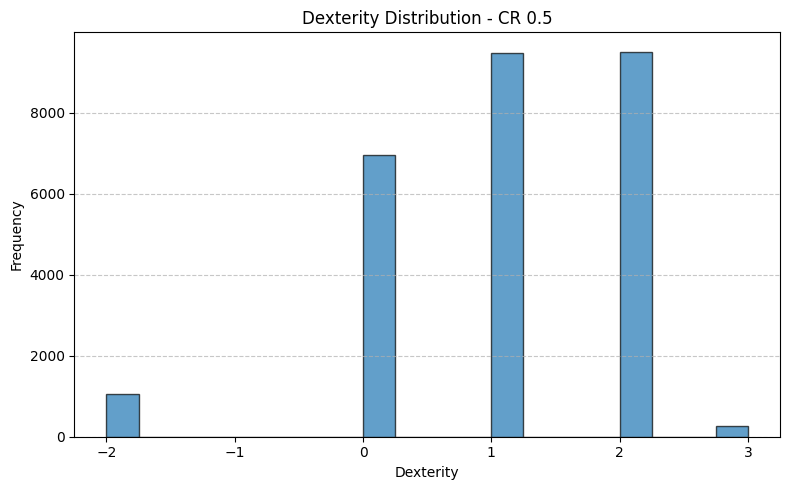

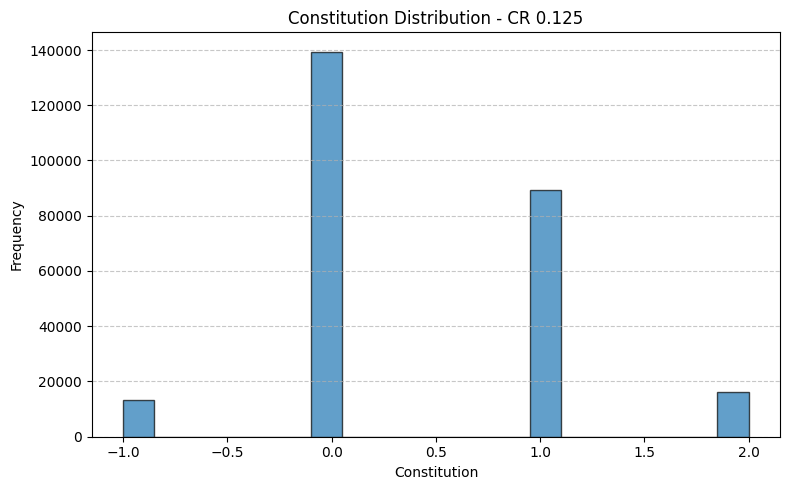

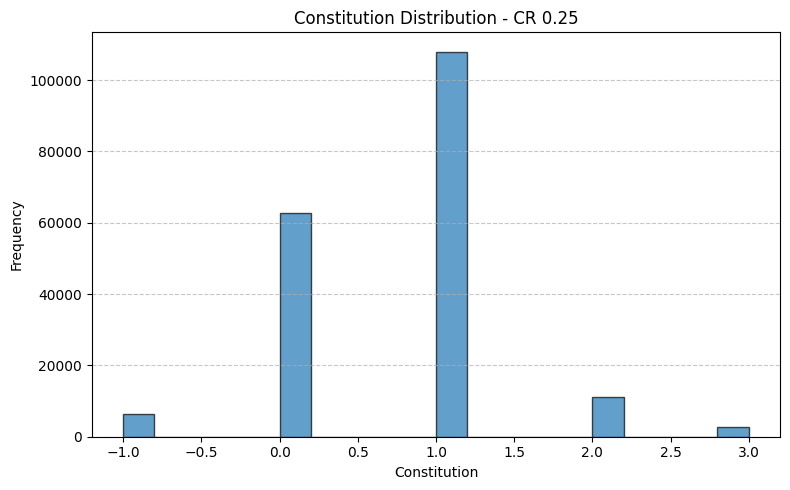

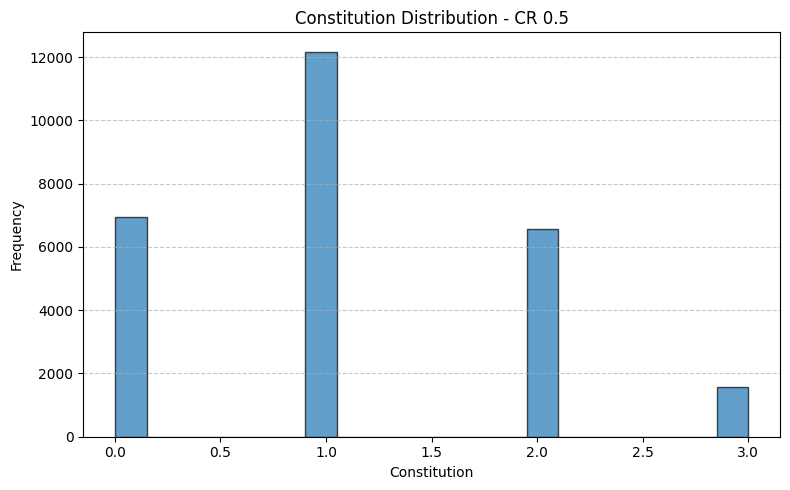

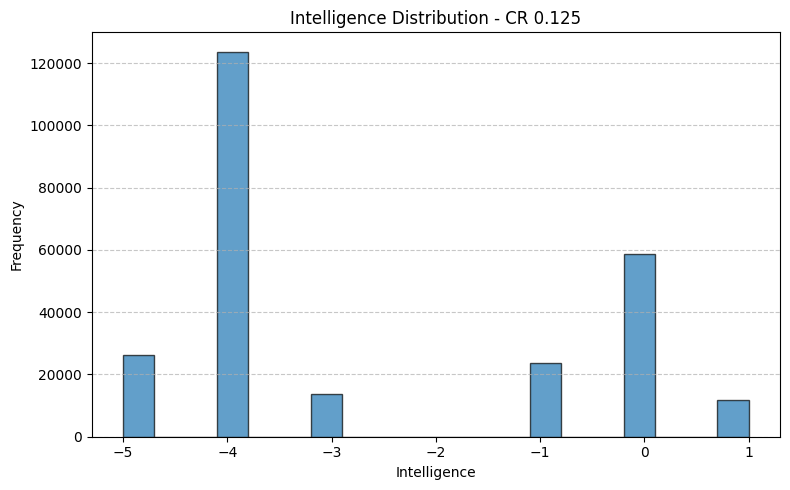

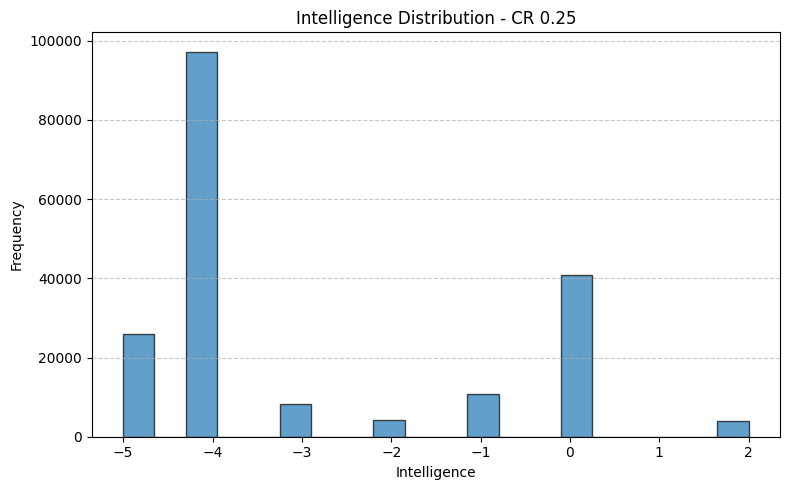

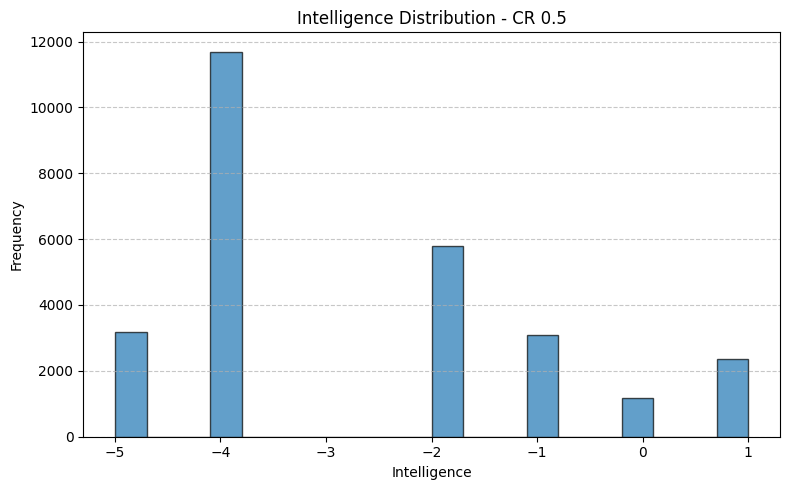

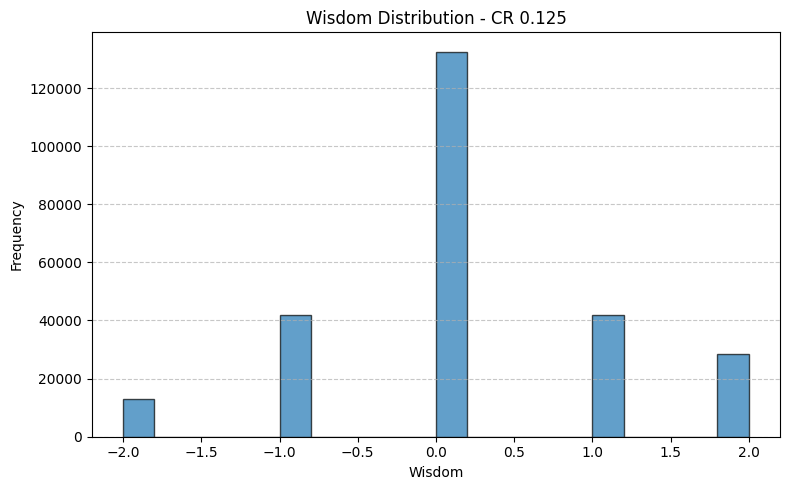

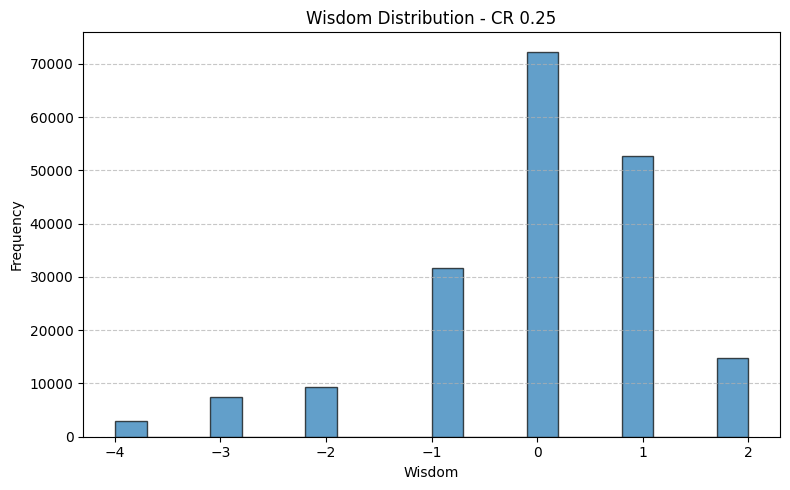

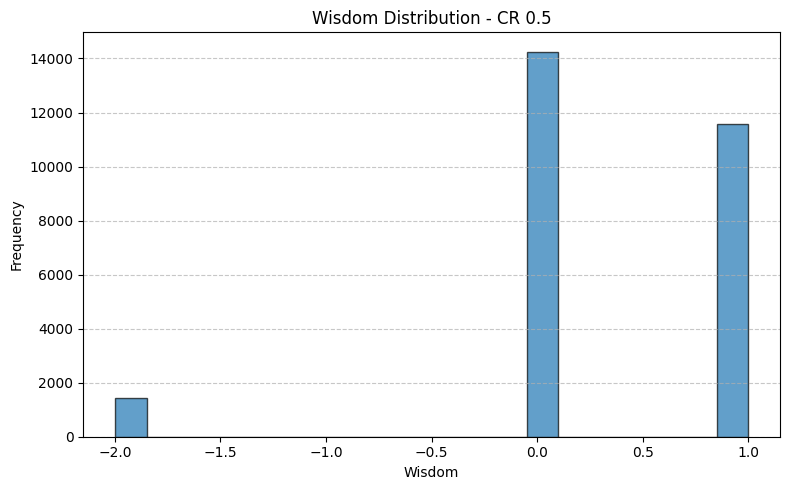

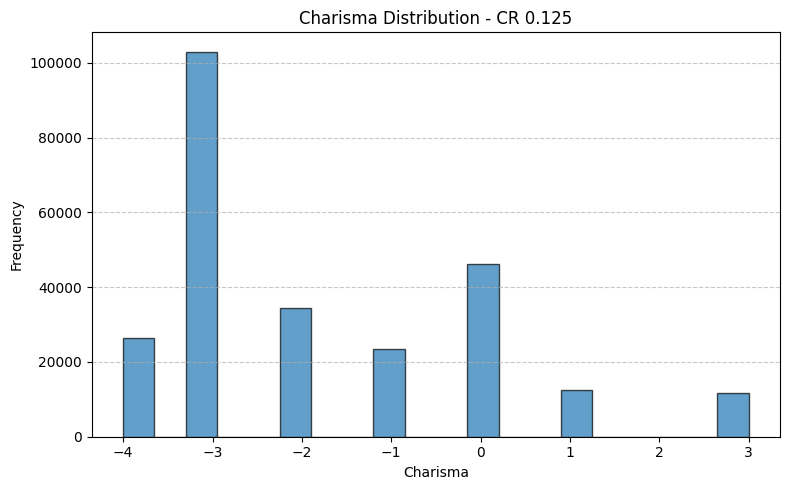

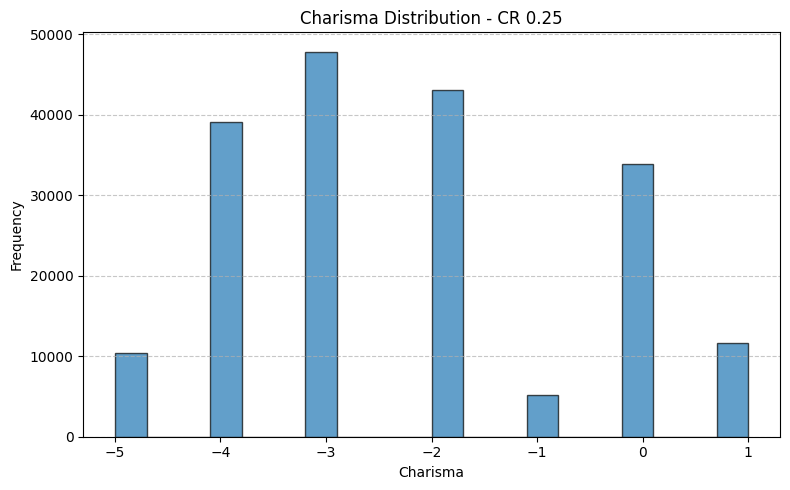

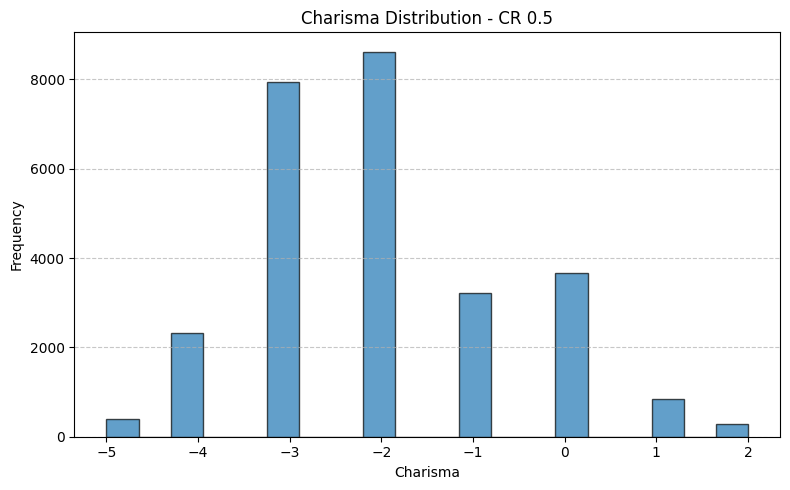

In [61]:


# Lista de CRs únicos ordenados
crs = sorted(df['monster1_cr'].dropna().unique())

# Histograms per monster attribute, one plot per CR
for attr_code, attr_name in monster_attributes_names.items():
    for cr in crs:
        values = df[df['monster1_cr'] == cr][attr_code].dropna()

        # Saltar si no hay datos
        if values.empty:
            continue

        plt.figure(figsize=(8, 5))
        plt.hist(values, bins=20, edgecolor='black', alpha=0.7)
        plt.title(f'{attr_name} Distribution - CR {cr}')
        plt.xlabel(attr_name)
        plt.ylabel('Frequency')
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()


In [62]:
df.head()

,pc1_class,pc1_level,pc1_hp_max,pc1_ac,pc1_STR,pc1_DEX,pc1_CON,pc1_INT,pc1_WIS,pc1_CHA,...,monster7_STR,monster7_DEX,monster7_CON,monster7_INT,monster7_WIS,monster7_CHA,winner,not_conscious_players_ratio,party_hp_ratio,difficulty
0,Bard,1,12,11,-1,0,4,0,0,4,...,0,0,0,0,0,0,monsters,1.0,0.0,9
1,Bard,1,10,13,-1,2,2,2,1,3,...,0,0,0,0,0,0,monsters,1.0,0.0,9
2,Bard,1,7,11,2,0,-1,0,2,4,...,0,0,0,0,0,0,monsters,1.0,0.0,9
3,Bard,1,8,10,-1,-1,0,2,1,3,...,0,0,0,0,0,0,monsters,1.0,0.0,9
4,Bard,1,11,12,4,1,3,0,2,4,...,0,0,0,0,0,0,monsters,1.0,0.0,9
